# Keras - Dense neural network (Advanced)

bla

#### Importere biblioteker

In [1]:
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt

# Making plots look better (Jupyter Notebook spesific)
import matplotlib as mpl
mpl.rcParams['patch.force_edgecolor'] = True

# Built in jupyter notebook commands
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

#### Importere datasett

In [2]:
data_raw = pd.read_csv('data_skomakerfjellet_advanced.csv',sep =';', low_memory = False)

data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5237 entries, 0 to 5236
Data columns (total 16 columns):
SKOM-Skomakerfj.-GS-T4015A3 -0104    5235 non-null float64
DNMI_69100...........T0015A3-0120    5237 non-null float64
/arome_windvel_6347_1092             5190 non-null float64
DNMI_71550...........T0015A3-0120    5237 non-null float64
/arome_windvel_6372_0961             5190 non-null float64
DNMI_71850...........T0015A3-0120    5237 non-null float64
/arome_windvel_6413_0933             5190 non-null float64
DNMI_71990...........T0015A3-0120    5237 non-null float64
/arome_windvel_6440_1047             5190 non-null float64
DNMI_72580...........T0015A3-0120    5237 non-null float64
/arome_windvel_6447_1156             5190 non-null float64
STORM-Bess-Vindretn-25km             5237 non-null int64
STORM-Bess-Vindhast-25km             5237 non-null float64
/arome_windvel_6422_1040             5190 non-null float64
/arome_airtemp_6422_1040             5190 non-null float64
Target    

In [3]:
data = data_raw.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5184 entries, 0 to 5236
Data columns (total 16 columns):
SKOM-Skomakerfj.-GS-T4015A3 -0104    5184 non-null float64
DNMI_69100...........T0015A3-0120    5184 non-null float64
/arome_windvel_6347_1092             5184 non-null float64
DNMI_71550...........T0015A3-0120    5184 non-null float64
/arome_windvel_6372_0961             5184 non-null float64
DNMI_71850...........T0015A3-0120    5184 non-null float64
/arome_windvel_6413_0933             5184 non-null float64
DNMI_71990...........T0015A3-0120    5184 non-null float64
/arome_windvel_6440_1047             5184 non-null float64
DNMI_72580...........T0015A3-0120    5184 non-null float64
/arome_windvel_6447_1156             5184 non-null float64
STORM-Bess-Vindretn-25km             5184 non-null int64
STORM-Bess-Vindhast-25km             5184 non-null float64
/arome_windvel_6422_1040             5184 non-null float64
/arome_airtemp_6422_1040             5184 non-null float64
Target    

In [4]:
num_features = len(data.columns) -1
print(num_features)

15


#### Konvertere til numpy-arrays

In [5]:
# Konverterer pandas.DataFrame til en numpy array
all_features_and_target_value = data.values.astype("float32")

# Trekker ut alle features (5 aromepunkter med 4 features + delayed = 21 features)
x = all_features_and_target_value[:,0:num_features]

# Trekker ut produksjonen som y-verdi
y = all_features_and_target_value[:,num_features]

#### Skalere data

In [6]:
from sklearn.preprocessing import MinMaxScaler

# Lage en scaler
scaler = MinMaxScaler()

# Anvende på features, her lagret i variablen x.
x = scaler.fit_transform(x)

#### Train/test Split

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = 67)

# Keras

In [8]:
import tensorflow as tf

#### Importere modellen

In [9]:
from tensorflow.contrib.keras import models

In [10]:
dnn_keras_model = models.Sequential()

#### Sette opp layers

In [11]:
from tensorflow.contrib.keras import layers

In [12]:
# Input layer
dnn_keras_model.add(layers.Dense(units=32, input_dim= num_features, activation='relu'))

In [13]:
'''Hidden Layers'''

dnn_keras_model.add(layers.Dense(units=16,activation='relu'))

dnn_keras_model.add(layers.Dense(units=8,activation='relu'))

dnn_keras_model.add(layers.Dense(units=2,activation='relu'))


In [14]:
# Output Layer
dnn_keras_model.add(layers.Dense(1))

#### Kompilere modellen

In [15]:
from tensorflow.contrib.keras import losses,optimizers,metrics,activations

In [16]:
#Kompilere - Alternative lossfunctions: mean_squared_error
dnn_keras_model.compile(optimizer='adam', loss = 'mean_absolute_error')

#### Trene modellen

In [17]:
from tensorflow.contrib.keras import losses,optimizers,metrics,activations

#### Callbacks og checkpoints

In [18]:
from tensorflow.contrib.keras import callbacks

In [19]:
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=500)

checkpoint = callbacks.ModelCheckpoint('checkpoint_model_advanced.h5', monitor = 'val_loss', 
                                       verbose = 1, save_best_only= True, mode= 'min')

In [20]:
# Trene modellen
np.random.seed(7)
dnn_keras_model.fit(X_train,y_train, epochs = 10000, batch_size=100, verbose=2, validation_data=(X_test, y_test),
                   callbacks=[checkpoint,early_stopping])


# validation_split=0.20
#validation_data=(X_test, y_test)

Train on 3628 samples, validate on 1556 samples
Epoch 1/10000
Epoch 00000: val_loss improved from inf to 5.16725, saving model to checkpoint_model_advanced.h5
0s - loss: 5.0175 - val_loss: 5.1673
Epoch 2/10000
Epoch 00001: val_loss improved from 5.16725 to 5.13940, saving model to checkpoint_model_advanced.h5
0s - loss: 4.9712 - val_loss: 5.1394
Epoch 3/10000
Epoch 00002: val_loss improved from 5.13940 to 5.11201, saving model to checkpoint_model_advanced.h5
0s - loss: 4.9426 - val_loss: 5.1120
Epoch 4/10000
Epoch 00003: val_loss improved from 5.11201 to 5.08487, saving model to checkpoint_model_advanced.h5
0s - loss: 4.9143 - val_loss: 5.0849
Epoch 5/10000
Epoch 00004: val_loss improved from 5.08487 to 5.05860, saving model to checkpoint_model_advanced.h5
0s - loss: 4.8866 - val_loss: 5.0586
Epoch 6/10000
Epoch 00005: val_loss improved from 5.05860 to 5.03367, saving model to checkpoint_model_advanced.h5
0s - loss: 4.8606 - val_loss: 5.0337
Epoch 7/10000
Epoch 00006: val_loss improved

0s - loss: 4.2101 - val_loss: 4.3994
Epoch 55/10000
Epoch 00054: val_loss improved from 4.39942 to 4.39254, saving model to checkpoint_model_advanced.h5
0s - loss: 4.2029 - val_loss: 4.3925
Epoch 56/10000
Epoch 00055: val_loss improved from 4.39254 to 4.38574, saving model to checkpoint_model_advanced.h5
0s - loss: 4.1957 - val_loss: 4.3857
Epoch 57/10000
Epoch 00056: val_loss improved from 4.38574 to 4.37905, saving model to checkpoint_model_advanced.h5
0s - loss: 4.1888 - val_loss: 4.3791
Epoch 58/10000
Epoch 00057: val_loss improved from 4.37905 to 4.37244, saving model to checkpoint_model_advanced.h5
0s - loss: 4.1820 - val_loss: 4.3724
Epoch 59/10000
Epoch 00058: val_loss improved from 4.37244 to 4.36628, saving model to checkpoint_model_advanced.h5
0s - loss: 4.1751 - val_loss: 4.3663
Epoch 60/10000
Epoch 00059: val_loss improved from 4.36628 to 4.35995, saving model to checkpoint_model_advanced.h5
0s - loss: 4.1685 - val_loss: 4.3600
Epoch 61/10000
Epoch 00060: val_loss improved

Epoch 00110: val_loss improved from 4.18160 to 4.18069, saving model to checkpoint_model_advanced.h5
0s - loss: 3.9845 - val_loss: 4.1807
Epoch 112/10000
Epoch 00111: val_loss improved from 4.18069 to 4.17998, saving model to checkpoint_model_advanced.h5
0s - loss: 3.9836 - val_loss: 4.1800
Epoch 113/10000
Epoch 00112: val_loss improved from 4.17998 to 4.17908, saving model to checkpoint_model_advanced.h5
0s - loss: 3.9829 - val_loss: 4.1791
Epoch 114/10000
Epoch 00113: val_loss improved from 4.17908 to 4.17835, saving model to checkpoint_model_advanced.h5
0s - loss: 3.9821 - val_loss: 4.1783
Epoch 115/10000
Epoch 00114: val_loss improved from 4.17835 to 4.17759, saving model to checkpoint_model_advanced.h5
0s - loss: 3.9813 - val_loss: 4.1776
Epoch 116/10000
Epoch 00115: val_loss improved from 4.17759 to 4.17671, saving model to checkpoint_model_advanced.h5
0s - loss: 3.9806 - val_loss: 4.1767
Epoch 117/10000
Epoch 00116: val_loss improved from 4.17671 to 4.17590, saving model to chec

Epoch 00166: val_loss improved from 4.15834 to 4.15818, saving model to checkpoint_model_advanced.h5
0s - loss: 3.9647 - val_loss: 4.1582
Epoch 168/10000
Epoch 00167: val_loss improved from 4.15818 to 4.15804, saving model to checkpoint_model_advanced.h5
0s - loss: 3.9646 - val_loss: 4.1580
Epoch 169/10000
Epoch 00168: val_loss improved from 4.15804 to 4.15795, saving model to checkpoint_model_advanced.h5
0s - loss: 3.9645 - val_loss: 4.1579
Epoch 170/10000
Epoch 00169: val_loss improved from 4.15795 to 4.15789, saving model to checkpoint_model_advanced.h5
0s - loss: 3.9645 - val_loss: 4.1579
Epoch 171/10000
Epoch 00170: val_loss improved from 4.15789 to 4.15776, saving model to checkpoint_model_advanced.h5
0s - loss: 3.9645 - val_loss: 4.1578
Epoch 172/10000
Epoch 00171: val_loss improved from 4.15776 to 4.15768, saving model to checkpoint_model_advanced.h5
0s - loss: 3.9644 - val_loss: 4.1577
Epoch 173/10000
Epoch 00172: val_loss improved from 4.15768 to 4.15758, saving model to chec

0s - loss: 3.9641 - val_loss: 4.1556
Epoch 237/10000
Epoch 00236: val_loss did not improve
0s - loss: 3.9640 - val_loss: 4.1556
Epoch 238/10000
Epoch 00237: val_loss did not improve
0s - loss: 3.9640 - val_loss: 4.1556
Epoch 239/10000
Epoch 00238: val_loss did not improve
0s - loss: 3.9640 - val_loss: 4.1556
Epoch 240/10000
Epoch 00239: val_loss did not improve
0s - loss: 3.9640 - val_loss: 4.1557
Epoch 241/10000
Epoch 00240: val_loss did not improve
0s - loss: 3.9640 - val_loss: 4.1557
Epoch 242/10000
Epoch 00241: val_loss did not improve
0s - loss: 3.9640 - val_loss: 4.1556
Epoch 243/10000
Epoch 00242: val_loss did not improve
0s - loss: 3.9640 - val_loss: 4.1557
Epoch 244/10000
Epoch 00243: val_loss did not improve
0s - loss: 3.9640 - val_loss: 4.1556
Epoch 245/10000
Epoch 00244: val_loss did not improve
0s - loss: 3.9640 - val_loss: 4.1556
Epoch 246/10000
Epoch 00245: val_loss did not improve
0s - loss: 3.9640 - val_loss: 4.1557
Epoch 247/10000
Epoch 00246: val_loss did not improve

Epoch 00323: val_loss did not improve
0s - loss: 3.9641 - val_loss: 4.1557
Epoch 325/10000
Epoch 00324: val_loss did not improve
0s - loss: 3.9640 - val_loss: 4.1556
Epoch 326/10000
Epoch 00325: val_loss did not improve
0s - loss: 3.9640 - val_loss: 4.1556
Epoch 327/10000
Epoch 00326: val_loss did not improve
0s - loss: 3.9640 - val_loss: 4.1555
Epoch 328/10000
Epoch 00327: val_loss did not improve
0s - loss: 3.9640 - val_loss: 4.1555
Epoch 329/10000
Epoch 00328: val_loss did not improve
0s - loss: 3.9640 - val_loss: 4.1556
Epoch 330/10000
Epoch 00329: val_loss did not improve
0s - loss: 3.9640 - val_loss: 4.1556
Epoch 331/10000
Epoch 00330: val_loss did not improve
0s - loss: 3.9640 - val_loss: 4.1556
Epoch 332/10000
Epoch 00331: val_loss did not improve
0s - loss: 3.9640 - val_loss: 4.1556
Epoch 333/10000
Epoch 00332: val_loss did not improve
0s - loss: 3.9640 - val_loss: 4.1556
Epoch 334/10000
Epoch 00333: val_loss did not improve
0s - loss: 3.9640 - val_loss: 4.1557
Epoch 335/10000

Epoch 00416: val_loss did not improve
0s - loss: 3.9640 - val_loss: 4.1556
Epoch 418/10000
Epoch 00417: val_loss did not improve
0s - loss: 3.9640 - val_loss: 4.1556
Epoch 419/10000
Epoch 00418: val_loss did not improve
0s - loss: 3.9640 - val_loss: 4.1556
Epoch 420/10000
Epoch 00419: val_loss did not improve
0s - loss: 3.9640 - val_loss: 4.1555
Epoch 421/10000
Epoch 00420: val_loss did not improve
0s - loss: 3.9640 - val_loss: 4.1556
Epoch 422/10000
Epoch 00421: val_loss did not improve
0s - loss: 3.9640 - val_loss: 4.1556
Epoch 423/10000
Epoch 00422: val_loss did not improve
0s - loss: 3.9640 - val_loss: 4.1556
Epoch 424/10000
Epoch 00423: val_loss did not improve
0s - loss: 3.9640 - val_loss: 4.1557
Epoch 425/10000
Epoch 00424: val_loss did not improve
0s - loss: 3.9640 - val_loss: 4.1557
Epoch 426/10000
Epoch 00425: val_loss did not improve
0s - loss: 3.9640 - val_loss: 4.1557
Epoch 427/10000
Epoch 00426: val_loss did not improve
0s - loss: 3.9640 - val_loss: 4.1556
Epoch 428/10000

Epoch 00507: val_loss did not improve
0s - loss: 3.9640 - val_loss: 4.1556
Epoch 509/10000
Epoch 00508: val_loss did not improve
0s - loss: 3.9640 - val_loss: 4.1556
Epoch 510/10000
Epoch 00509: val_loss did not improve
0s - loss: 3.9640 - val_loss: 4.1557
Epoch 511/10000
Epoch 00510: val_loss did not improve
0s - loss: 3.9640 - val_loss: 4.1557
Epoch 512/10000
Epoch 00511: val_loss did not improve
0s - loss: 3.9640 - val_loss: 4.1556
Epoch 513/10000
Epoch 00512: val_loss did not improve
0s - loss: 3.9641 - val_loss: 4.1558
Epoch 514/10000
Epoch 00513: val_loss did not improve
0s - loss: 3.9640 - val_loss: 4.1556
Epoch 515/10000
Epoch 00514: val_loss did not improve
0s - loss: 3.9640 - val_loss: 4.1557
Epoch 516/10000
Epoch 00515: val_loss did not improve
0s - loss: 3.9640 - val_loss: 4.1557
Epoch 517/10000
Epoch 00516: val_loss did not improve
0s - loss: 3.9640 - val_loss: 4.1557
Epoch 518/10000
Epoch 00517: val_loss did not improve
0s - loss: 3.9640 - val_loss: 4.1557
Epoch 519/10000

Epoch 00600: val_loss did not improve
0s - loss: 3.9640 - val_loss: 4.1556
Epoch 602/10000
Epoch 00601: val_loss did not improve
0s - loss: 3.9640 - val_loss: 4.1556
Epoch 603/10000
Epoch 00602: val_loss did not improve
0s - loss: 3.9640 - val_loss: 4.1557
Epoch 604/10000
Epoch 00603: val_loss did not improve
0s - loss: 3.9640 - val_loss: 4.1556
Epoch 605/10000
Epoch 00604: val_loss did not improve
0s - loss: 3.9640 - val_loss: 4.1557
Epoch 606/10000
Epoch 00605: val_loss did not improve
0s - loss: 3.9640 - val_loss: 4.1556
Epoch 607/10000
Epoch 00606: val_loss did not improve
0s - loss: 3.9640 - val_loss: 4.1557
Epoch 608/10000
Epoch 00607: val_loss did not improve
0s - loss: 3.9640 - val_loss: 4.1557
Epoch 609/10000
Epoch 00608: val_loss did not improve
0s - loss: 3.9640 - val_loss: 4.1558
Epoch 610/10000
Epoch 00609: val_loss did not improve
0s - loss: 3.9640 - val_loss: 4.1557
Epoch 611/10000
Epoch 00610: val_loss did not improve
0s - loss: 3.9640 - val_loss: 4.1557
Epoch 612/10000

Epoch 00694: val_loss did not improve
0s - loss: 3.9640 - val_loss: 4.1556
Epoch 696/10000
Epoch 00695: val_loss did not improve
0s - loss: 3.9640 - val_loss: 4.1556
Epoch 697/10000
Epoch 00696: val_loss did not improve
0s - loss: 3.9640 - val_loss: 4.1555
Epoch 698/10000
Epoch 00697: val_loss did not improve
0s - loss: 3.9640 - val_loss: 4.1556
Epoch 699/10000
Epoch 00698: val_loss did not improve
0s - loss: 3.9640 - val_loss: 4.1556
Epoch 700/10000
Epoch 00699: val_loss did not improve
0s - loss: 3.9640 - val_loss: 4.1556
Epoch 701/10000
Epoch 00700: val_loss did not improve
0s - loss: 3.9640 - val_loss: 4.1556
Epoch 702/10000
Epoch 00701: val_loss did not improve
0s - loss: 3.9640 - val_loss: 4.1556
Epoch 703/10000
Epoch 00702: val_loss did not improve
0s - loss: 3.9640 - val_loss: 4.1557
Epoch 704/10000
Epoch 00703: val_loss did not improve
0s - loss: 3.9640 - val_loss: 4.1556
Epoch 705/10000
Epoch 00704: val_loss did not improve
0s - loss: 3.9640 - val_loss: 4.1557
Epoch 706/10000

# Resultater

In [21]:
from sklearn import metrics

In [22]:
#finished_model = dnn_keras_model

finished_model = models.load_model('checkpoint_model_advanced.h5')

#### Prediksjon på testsett

In [23]:
final_preds = finished_model.predict(X_test)

In [24]:
# 5000 epocs , b_size = 10, 24(24)[10](1)
print('Mean Absolute Error: \t\t\t', metrics.mean_absolute_error(y_test, final_preds))
print('Mean Squared Error: \t\t\t', metrics.mean_squared_error(y_test, final_preds))
print('Root Mean Squared Error: \t\t', np.sqrt(metrics.mean_squared_error(y_test, final_preds)))

Mean Absolute Error: 			 4.1554
Mean Squared Error: 			 26.89
Root Mean Squared Error: 		 5.18556


#### Prediksjon på treningdata

In [25]:
train_preds = finished_model.predict(X_train)

In [26]:
# 70% av data (benyttet til treningen)
print('Mean Absolute Error: \t\t\t', metrics.mean_absolute_error(y_train,train_preds))
print('Mean Squared Error: \t\t\t', metrics.mean_squared_error(y_train, train_preds))
print('Root Mean Squared Error: \t\t', np.sqrt(metrics.mean_squared_error(y_train, train_preds)))

Mean Absolute Error: 			 3.964
Mean Squared Error: 			 24.9854
Root Mean Squared Error: 		 4.99854


# Visualisere resultater

#### Lager oversikt over testdataen

In [27]:
predictions = list(final_preds)

predictions_list = []

for pred in predictions:
    predictions_list.append(pred[0])

In [28]:
Oversikt = pd.DataFrame(data = {'real': y_test, 'predicitions': predictions_list})

Oversikt['differanse'] = Oversikt['real'] - Oversikt['predicitions'] 

Oversikt['abs_diff'] = Oversikt['differanse'].apply(abs)

### Scatterplot med fargekodede prediskjoner

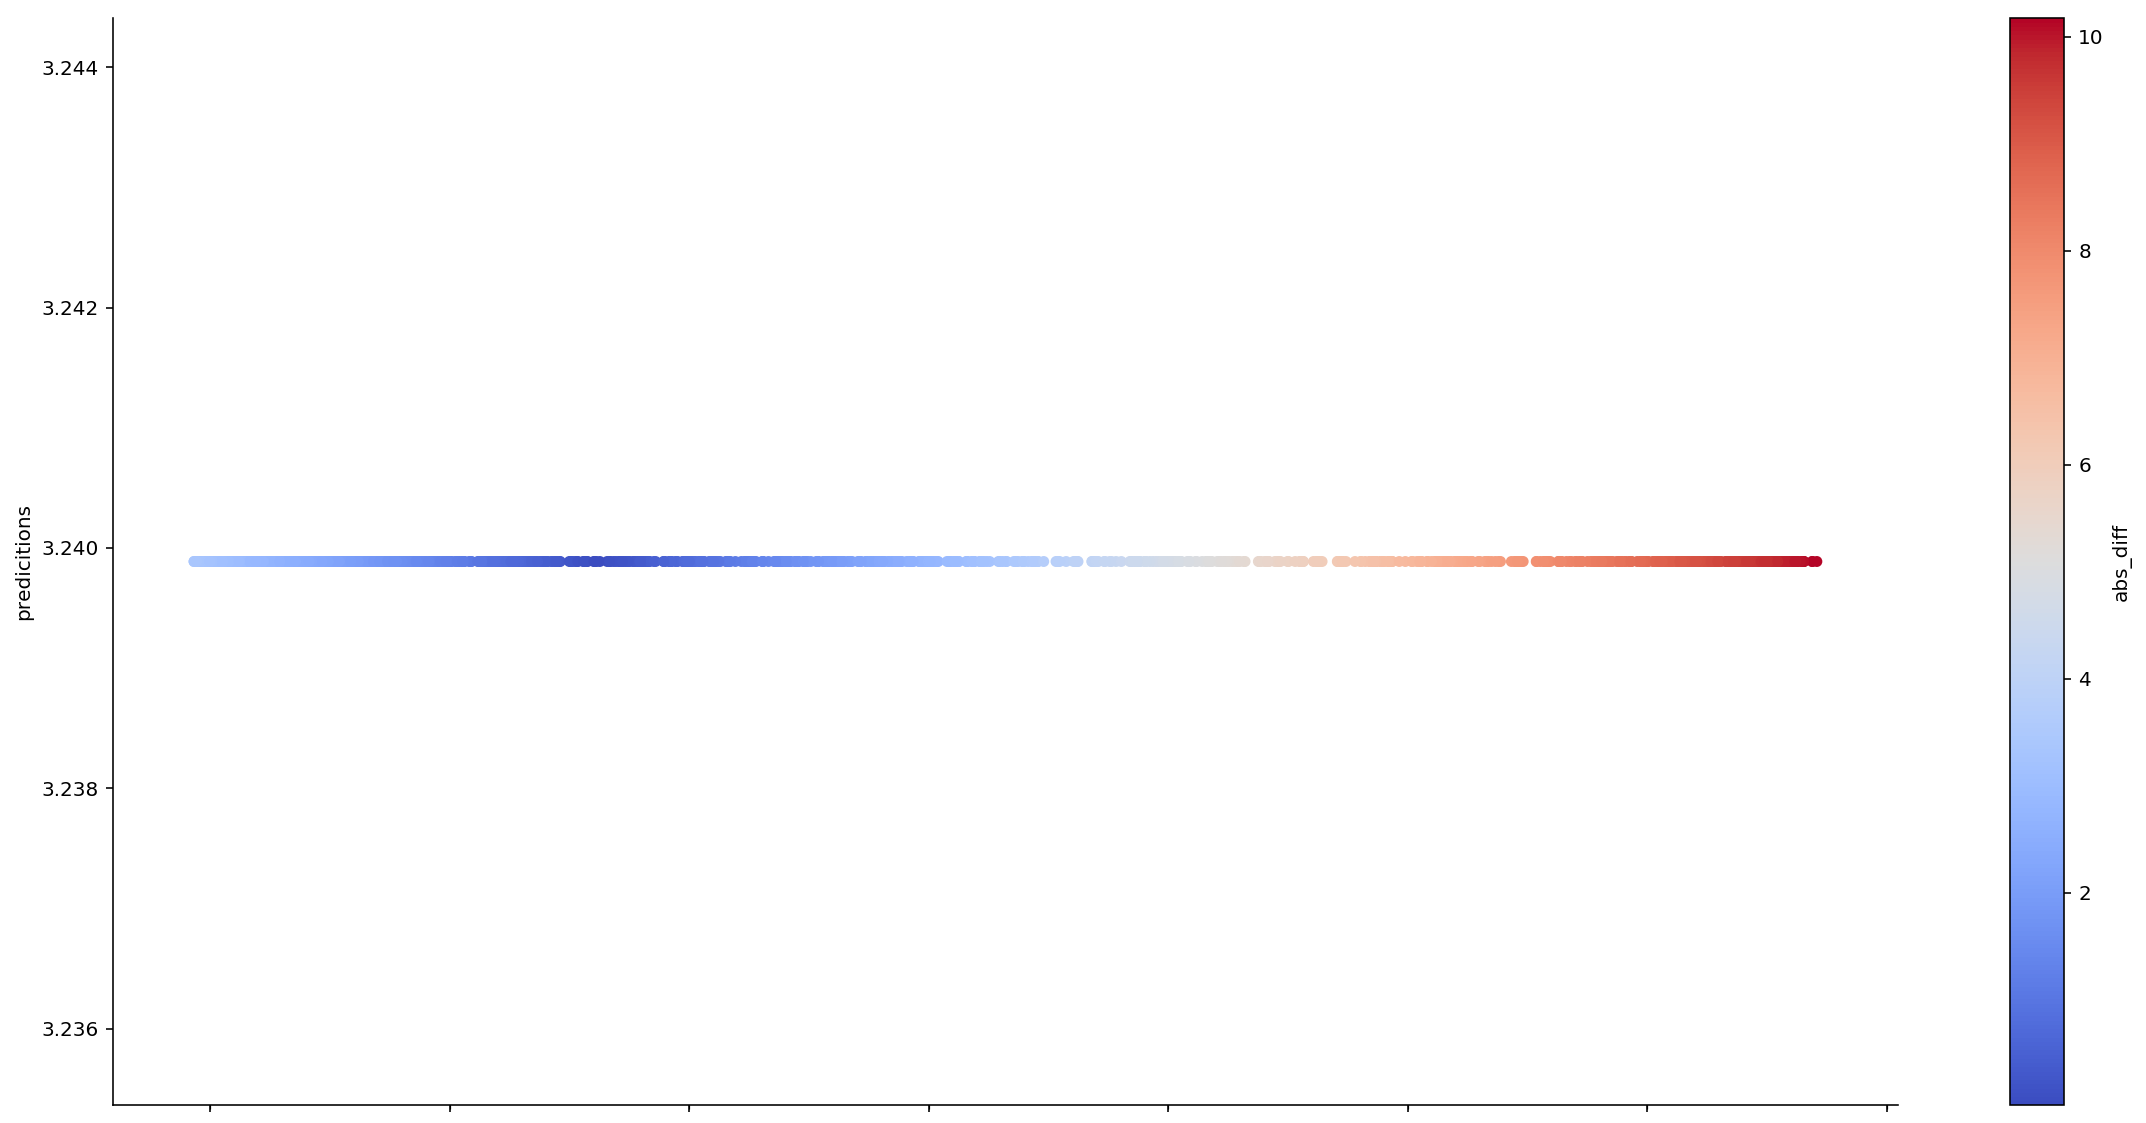

In [29]:
ax = Oversikt.plot.scatter(x='real',y='predicitions',
                   c='abs_diff',cmap='coolwarm', figsize = (20,10))

ax.set_xlabel("x label")

#remove spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

fig = ax.get_figure()
#fig.savefig('keras_model.png')

### Feilfordelingen av prediksjoner

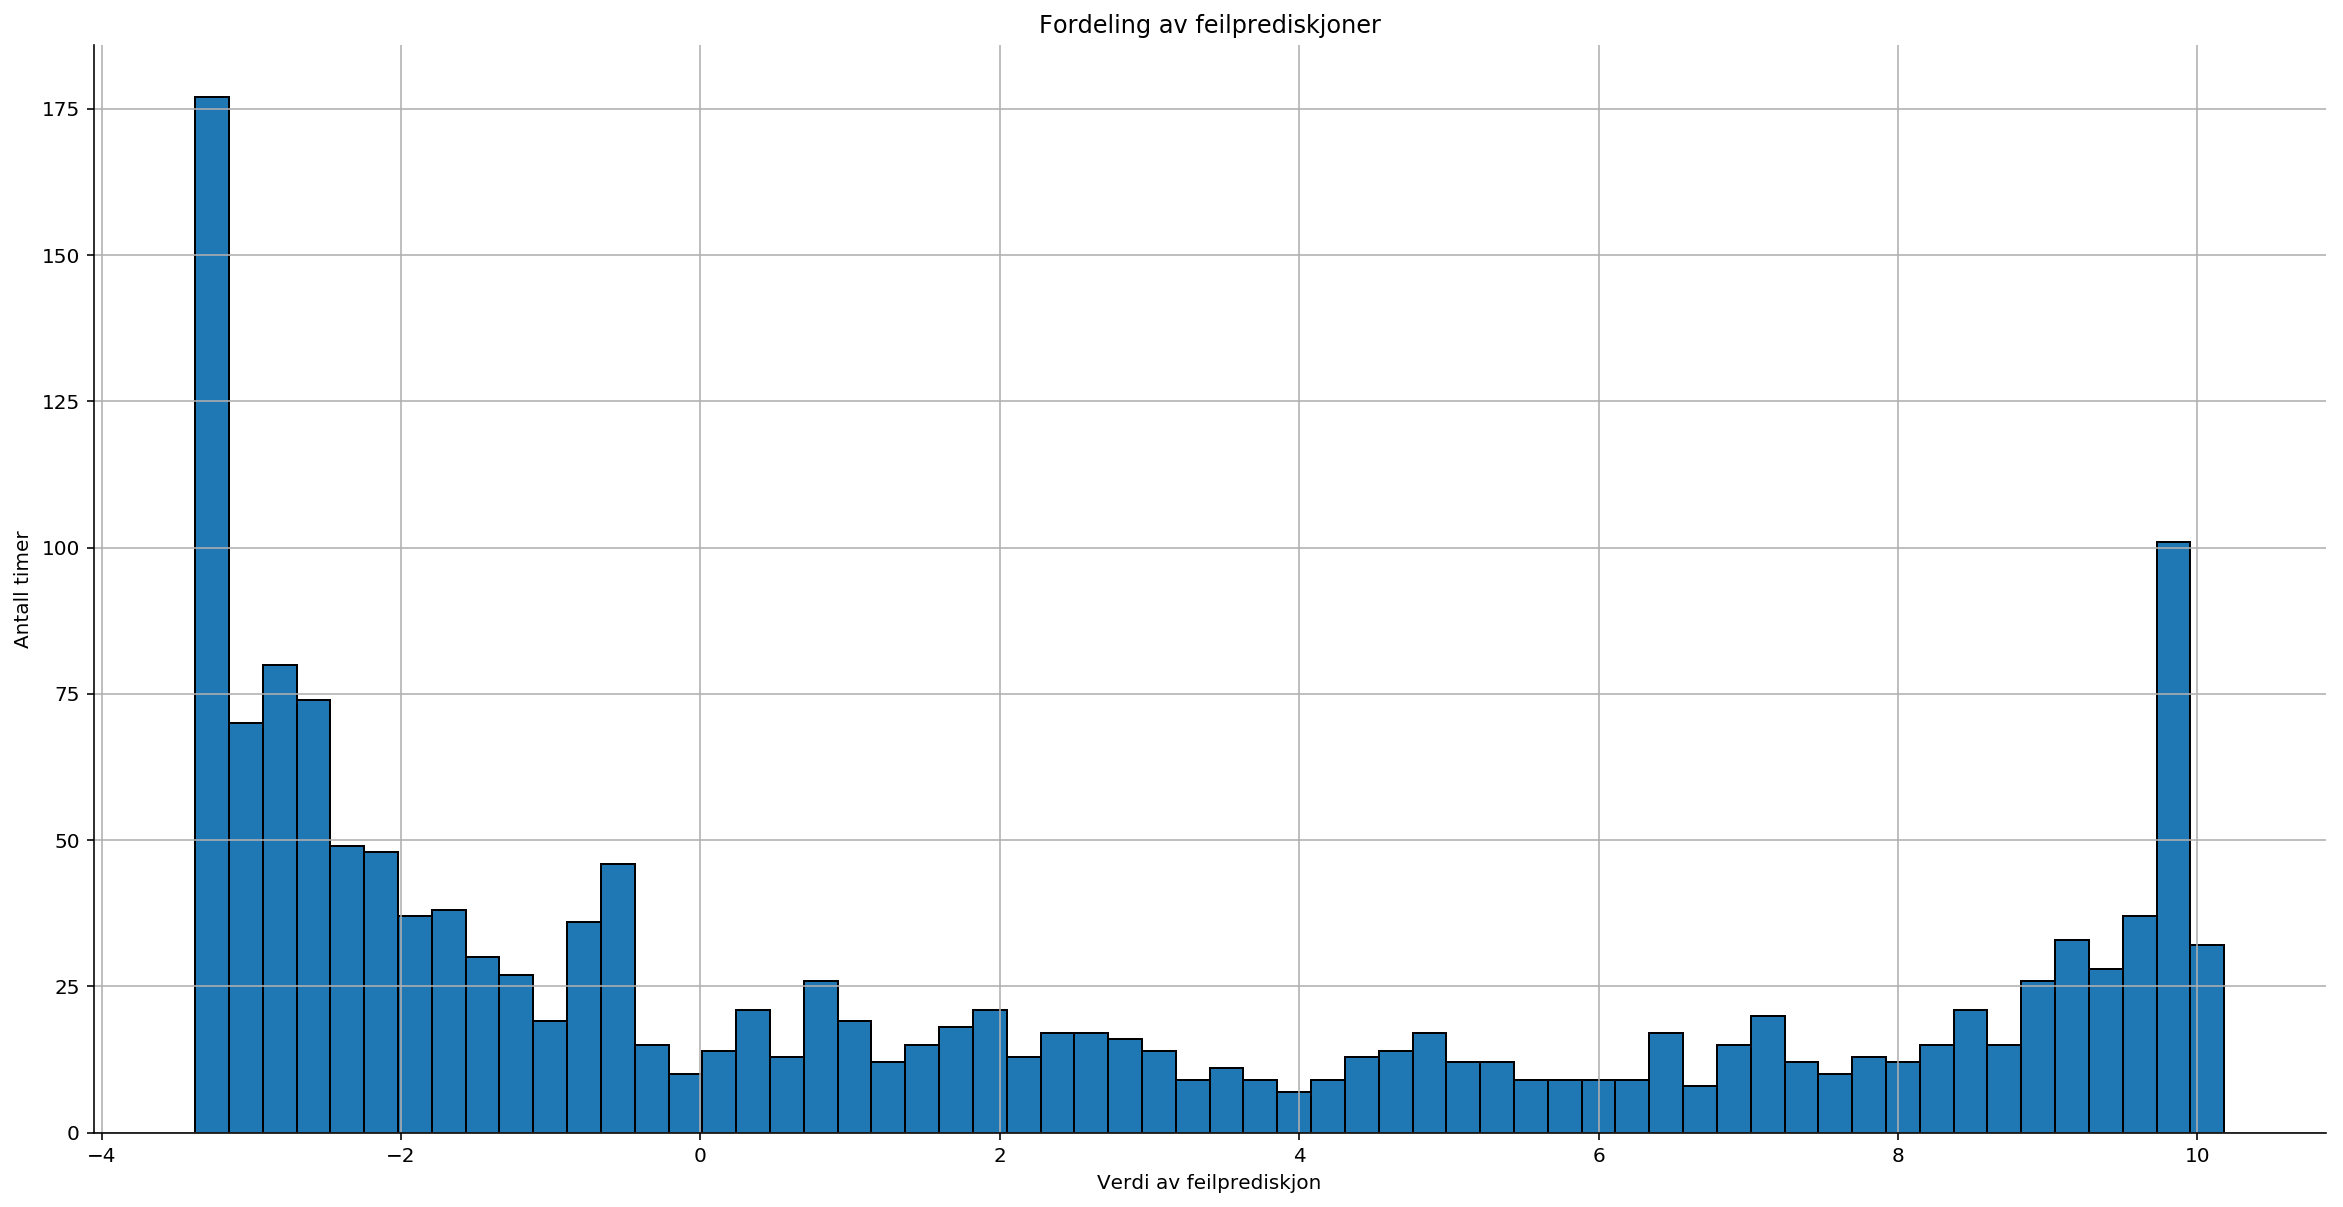

In [30]:
ax = Oversikt['differanse'].hist(bins=60,figsize = (20,10))

plt.xlabel('Verdi av feilprediskjon')
plt.ylabel('Antall timer')
plt.title('Fordeling av feilprediskjoner')

#remove spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

fig = ax.get_figure()
#fig.savefig('hist av abs.png')

# Ekte plott av prediksjonene

#### Forsøk på å hente ut et utdrag av dataen

In [31]:
all_predictions = finished_model.predict(x[:,:])

predictions_all = list(all_predictions)

predictions_all_list = []

for pred in predictions_all:
    predictions_all_list.append(pred[0])
    
timeline = pd.DataFrame(data = {'real': y[:], 'predicitions': predictions_all_list})

# Adjust in order to plot 'dagens modell'
data_raw.dropna(inplace=True)
data_raw.reset_index(inplace=True)

#### Tidsplot av data

KeyError: 'the label [YVIK-YtreVikna1-Sum-produksjon] is not in the [columns]'

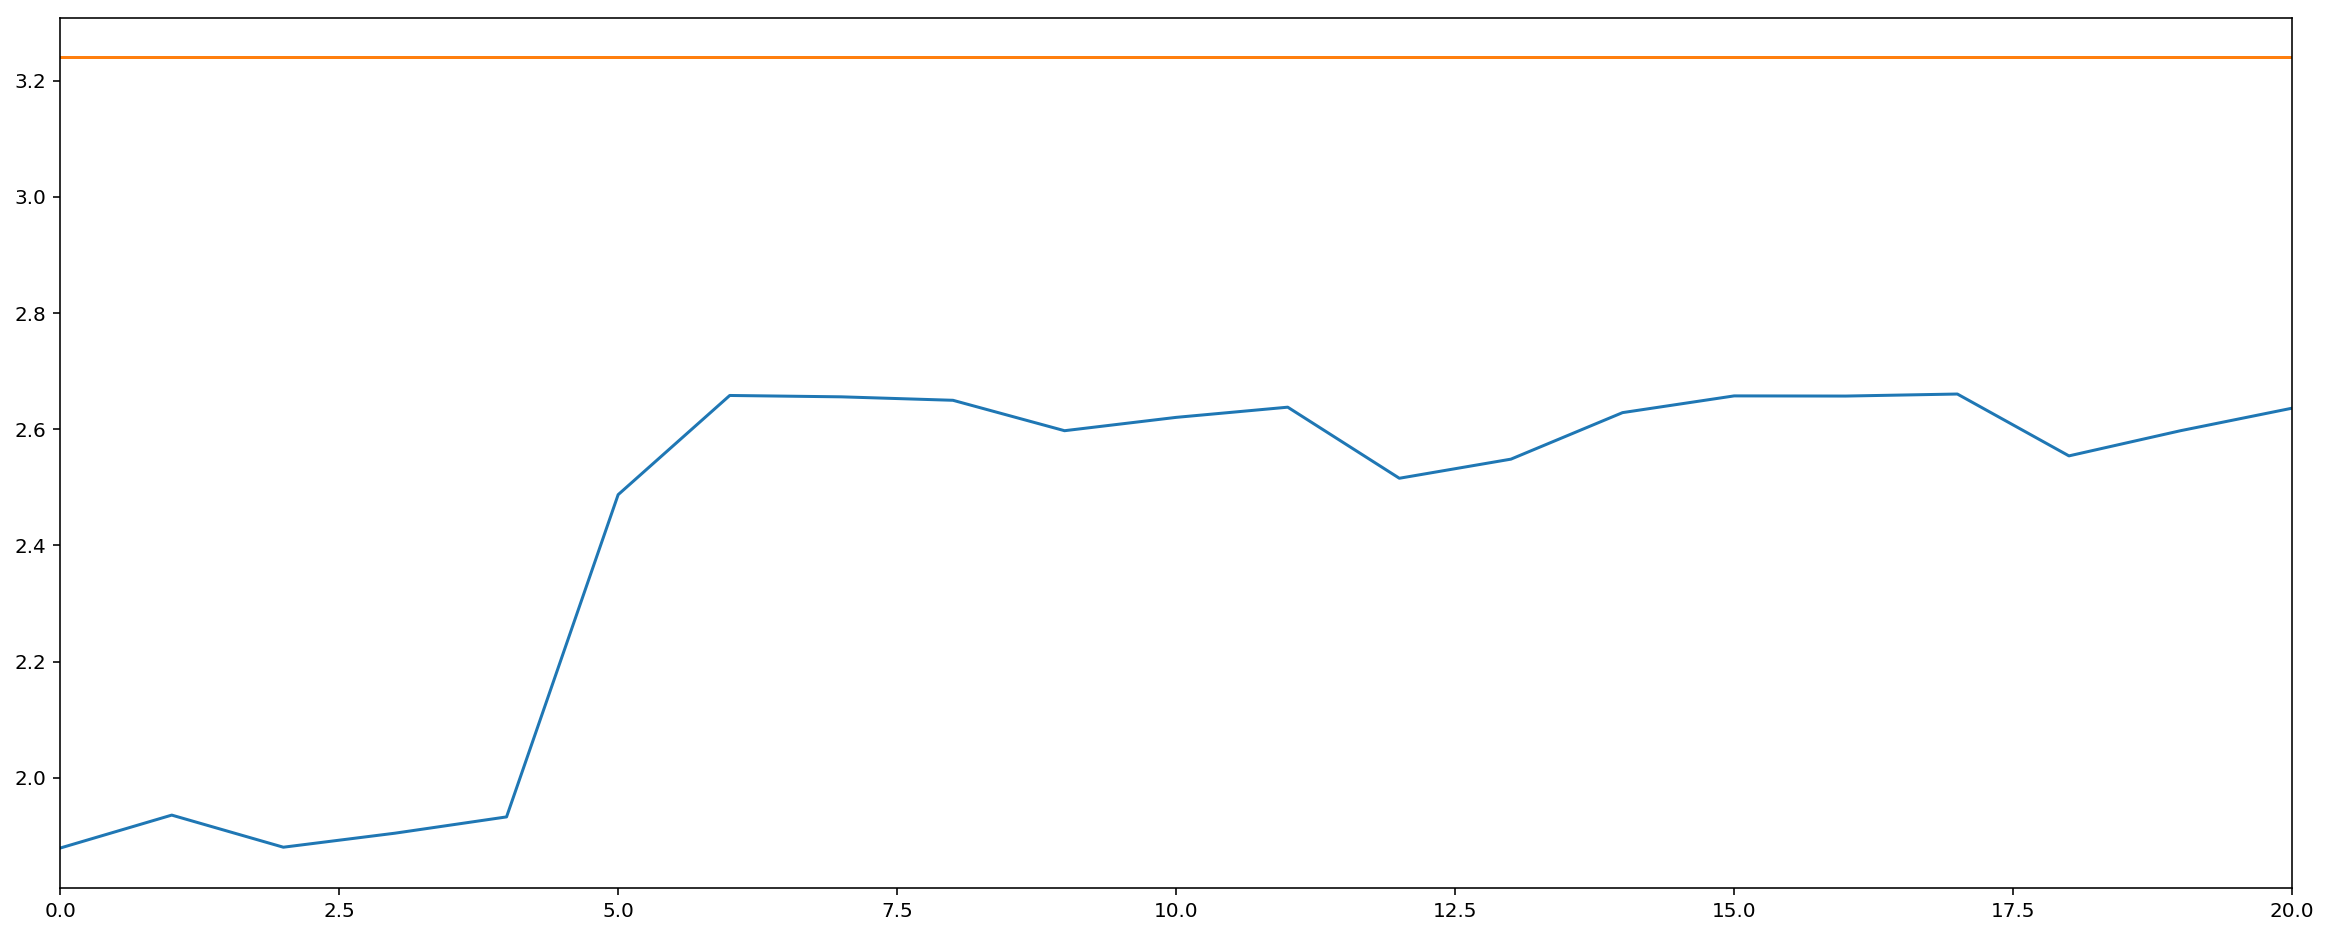

In [32]:
# Justere tidslinjen på plottet
start = 0
slutt = 20

ax = timeline.loc[start:slutt,'real'].plot(figsize=(20,8))
ax = timeline.loc[start:slutt,'predicitions'].plot(figsize=(20,8))
ax = data_raw.loc[start:slutt,'YVIK-YtreVikna1-Sum-produksjon'].plot(figsize=(20,8))

 
plt.xlabel('Tid (antall timer)')
plt.ylabel('Produksjon i Mega Watt (MW)')
plt.title('Utdrag fra tidsperioden')

plt.legend(loc='best')

#remove spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Saves figure
fig = ax.get_figure()
#fig.savefig('september10.png')